In [2]:
from typing import * 
from bitarray import bitarray

#rolling window flipflop counter
def count_flip_flops(byte: bitarray) -> int:
    flip_flops = 0
    for i in range(0, len(byte)-2):
        window = byte[i:i+3]
        if window[0] != window[1] and window[1] != window[2]:
            flip_flops +=1
    return flip_flops
                
unique_bytes = [bitarray(n.to_bytes(1, "big")) for n in range(0,256)]

flip_flop_count = {}

#populate dict with organized flipflop counted bytes
for byte in unique_bytes:
    flip_flops = count_flip_flops(byte)
    if str(flip_flops) in flip_flop_count.keys():
        flip_flop_count[str(flip_flops)].append(byte)
        continue
    flip_flop_count[str(flip_flops)] = [byte]


In [3]:
for key in flip_flop_count.keys():
    print(f"flip flops: {key}, inner_entropy: {int(key)/8*100:.2f}%, total count: {len(flip_flop_count[key])}, frequency: {(len(flip_flop_count[key])*100)/256:.2f}%, entropy_contribution: {(int(key)/8)*(len(flip_flop_count[key])/256)*100:.2f}%\n")

flip flops: 0, inner_entropy: 0.00%, total count: 68, frequency: 26.56%, entropy_contribution: 0.00%

flip flops: 1, inner_entropy: 12.50%, total count: 76, frequency: 29.69%, entropy_contribution: 3.71%

flip flops: 2, inner_entropy: 25.00%, total count: 58, frequency: 22.66%, entropy_contribution: 5.66%

flip flops: 3, inner_entropy: 37.50%, total count: 32, frequency: 12.50%, entropy_contribution: 4.69%

flip flops: 4, inner_entropy: 50.00%, total count: 16, frequency: 6.25%, entropy_contribution: 3.12%

flip flops: 5, inner_entropy: 62.50%, total count: 4, frequency: 1.56%, entropy_contribution: 0.98%

flip flops: 6, inner_entropy: 75.00%, total count: 2, frequency: 0.78%, entropy_contribution: 0.59%



In [4]:

#define the optimal distribution of flip flop
def opt_ff_dist(bucket_size: int = 60):
    simple_table = {}
    selection_table = {}
    for k,v in flip_flop_count.items():
        simple_table[k] = len(v)
        selection_table[k] = 0
        
    def ent_bucketization(table: dict):
        pop_size = sum(table.values())
        per_byte_ent_list = []
        for key in table:
            weight = table[key]/pop_size
            inter_byte_ent = int(key)/8
            per_byte_ent = weight * inter_byte_ent
            per_byte_ent_list.append(round(per_byte_ent, 4))
        return per_byte_ent_list

    for i in range(0, bucket_size):
        ent_map = ent_bucketization(simple_table)
        index_of_max = ent_map.index(max(ent_map))
        simple_table[str(index_of_max)] -= 1
        selection_table[str(index_of_max)] += 1
        

    return selection_table


optimal_distribution = opt_ff_dist()

for k,v in optimal_distribution.items():
    print(f"{k} : {v}\n")

    

0 : 0

1 : 17

2 : 29

3 : 13

4 : 1

5 : 0

6 : 0



In [5]:
#define decimal values of bucketized flipflop byte values
dec_entropy_ff_map = {k:[int(dec_val.to01(), 2) for dec_val in v] for  k,v in flip_flop_count.items()}

for k,v in dec_entropy_ff_map.items():
    print(f"{k} : {v}\n")

0 : [0, 1, 3, 6, 7, 12, 14, 15, 24, 25, 28, 30, 31, 48, 49, 51, 56, 57, 60, 62, 63, 96, 97, 99, 102, 103, 112, 113, 115, 120, 121, 124, 126, 127, 128, 129, 131, 134, 135, 140, 142, 143, 152, 153, 156, 158, 159, 192, 193, 195, 198, 199, 204, 206, 207, 224, 225, 227, 230, 231, 240, 241, 243, 248, 249, 252, 254, 255]

1 : [2, 4, 8, 9, 13, 16, 17, 19, 27, 29, 32, 33, 35, 38, 39, 50, 54, 55, 59, 61, 64, 65, 67, 70, 71, 76, 78, 79, 98, 100, 108, 110, 111, 114, 118, 119, 123, 125, 130, 132, 136, 137, 141, 144, 145, 147, 155, 157, 176, 177, 179, 184, 185, 188, 190, 191, 194, 196, 200, 201, 205, 216, 217, 220, 222, 223, 226, 228, 236, 238, 239, 242, 246, 247, 251, 253]

2 : [5, 11, 18, 22, 23, 26, 34, 36, 44, 46, 47, 52, 58, 66, 68, 72, 73, 77, 88, 89, 92, 94, 95, 101, 104, 105, 109, 116, 122, 133, 139, 146, 150, 151, 154, 160, 161, 163, 166, 167, 178, 182, 183, 187, 189, 197, 203, 208, 209, 211, 219, 221, 229, 232, 233, 237, 244, 250]

3 : [10, 20, 37, 40, 41, 45, 53, 69, 75, 80, 81, 83, 91, 9

In [6]:
#def bit transition counter
def count_transitions(byte: bitarray) -> int:
    transitions = 0
    for i in range(0, len(byte)-1):
        if byte[i] != byte[i+1]:
            transitions += 1
    return transitions

#create dictionary mapping tranisitions to each byte
transition_count: Dict[str, List[bitarray]] = {}

for byte in unique_bytes:
    count = count_transitions(byte)
    if str(count) in transition_count.keys():
        transition_count[str(count)].append(byte)
        continue
    transition_count[str(count)] = [byte]


In [7]:
for k,v in transition_count.items():
    print(f"transition count: {k}, inner_entropy: {int(k)/8*100:.2f}%, total count: {len(v)}, frequency: {len(v)/256*100:.2f}%, entropy_contribution: {(int(k)/8)*(len(v)/256)*100:.2f}%\n")

transition count: 0, inner_entropy: 0.00%, total count: 2, frequency: 0.78%, entropy_contribution: 0.00%

transition count: 1, inner_entropy: 12.50%, total count: 14, frequency: 5.47%, entropy_contribution: 0.68%

transition count: 2, inner_entropy: 25.00%, total count: 42, frequency: 16.41%, entropy_contribution: 4.10%

transition count: 3, inner_entropy: 37.50%, total count: 70, frequency: 27.34%, entropy_contribution: 10.25%

transition count: 4, inner_entropy: 50.00%, total count: 70, frequency: 27.34%, entropy_contribution: 13.67%

transition count: 5, inner_entropy: 62.50%, total count: 42, frequency: 16.41%, entropy_contribution: 10.25%

transition count: 6, inner_entropy: 75.00%, total count: 14, frequency: 5.47%, entropy_contribution: 4.10%

transition count: 7, inner_entropy: 87.50%, total count: 2, frequency: 0.78%, entropy_contribution: 0.68%



In [8]:
#define decimal values of bucketized transition byte entropy values
dec_entropy_tr_map = {k:[int(dec_val.to01(), 2) for dec_val in v] for  k,v in transition_count.items()}

for k,v in dec_entropy_tr_map.items():
    print(f"{k} : {v}\n")

0 : [0, 255]

1 : [1, 3, 7, 15, 31, 63, 127, 128, 192, 224, 240, 248, 252, 254]

2 : [2, 4, 6, 8, 12, 14, 16, 24, 28, 30, 32, 48, 56, 60, 62, 64, 96, 112, 120, 124, 126, 129, 131, 135, 143, 159, 191, 193, 195, 199, 207, 223, 225, 227, 231, 239, 241, 243, 247, 249, 251, 253]

3 : [5, 9, 11, 13, 17, 19, 23, 25, 27, 29, 33, 35, 39, 47, 49, 51, 55, 57, 59, 61, 65, 67, 71, 79, 95, 97, 99, 103, 111, 113, 115, 119, 121, 123, 125, 130, 132, 134, 136, 140, 142, 144, 152, 156, 158, 160, 176, 184, 188, 190, 194, 196, 198, 200, 204, 206, 208, 216, 220, 222, 226, 228, 230, 232, 236, 238, 242, 244, 246, 250]

4 : [10, 18, 20, 22, 26, 34, 36, 38, 40, 44, 46, 50, 52, 54, 58, 66, 68, 70, 72, 76, 78, 80, 88, 92, 94, 98, 100, 102, 104, 108, 110, 114, 116, 118, 122, 133, 137, 139, 141, 145, 147, 151, 153, 155, 157, 161, 163, 167, 175, 177, 179, 183, 185, 187, 189, 197, 201, 203, 205, 209, 211, 215, 217, 219, 221, 229, 233, 235, 237, 245]

5 : [21, 37, 41, 43, 45, 53, 69, 73, 75, 77, 81, 83, 87, 89, 91, 93

In [9]:
#synthesize first-order/second-order entropy heat-map

#organized as 2D tuple of per_byte overall entropy contribution (first-order, second-order)
entropy_heatmap: Dict[str, Tuple[float, ...]] ={str(k):(0.0, 0.0) for k in range(0,256)}

for k in transition_count.keys():
    for byte in transition_count[k]:
        entropy_heatmap[str(int(byte.to01(), 2))] = (round((int(k)/8)*(len(transition_count[k])/256), 4), 0.0)
for k in flip_flop_count.keys():
    for byte in flip_flop_count[k]:
        entropy_heatmap[str(int(byte.to01(), 2))] = (entropy_heatmap[str(int(byte.to01(), 2))][0], round(((int(k)/8)*(len(flip_flop_count[k])/256)), 4))

heat_map_point_list = [val for val in entropy_heatmap.values()]

# for k,v in entropy_heatmap.items():
#     print(f"{k}: {v}")

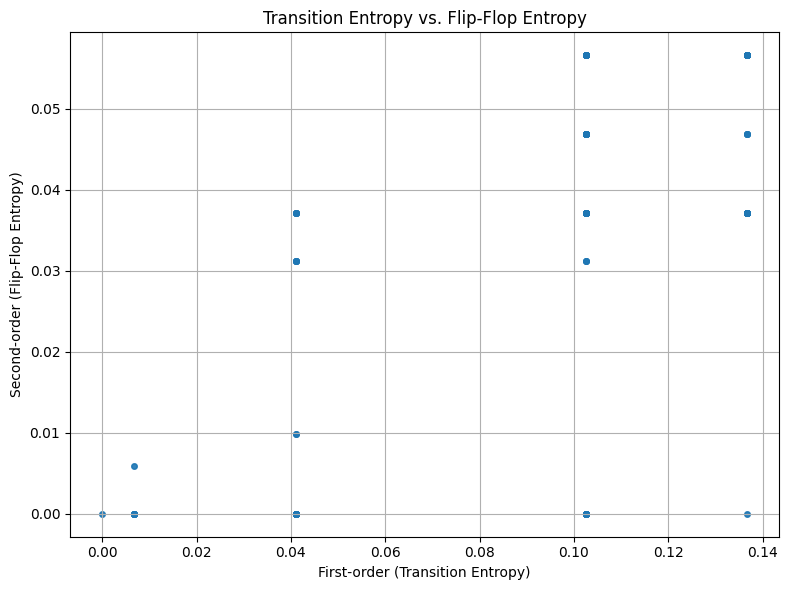

In [10]:
import matplotlib.pyplot as plt

# Replace this with your actual list of tuples
points = heat_map_point_list

# Unpack into x and y coordinates
x_vals = [x for x, y in points]
y_vals = [y for x, y in points]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y_vals, s=15, alpha=0.7)

# Optional aesthetics
plt.title("Transition Entropy vs. Flip-Flop Entropy")
plt.xlabel("First-order (Transition Entropy)")
plt.ylabel("Second-order (Flip-Flop Entropy)")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [13]:
#bucketize entropy heat-map
from collections import defaultdict

# Inverted mapping: (entropy_tuple) -> [list of int byte values]
inverted_heatmap = defaultdict(list)

for byte_str, entropy_tuple in entropy_heatmap.items():
    byte_val = int(byte_str)
    inverted_heatmap[entropy_tuple].append(byte_val)

# Optional: convert to regular dict if needed
inverted_heatmap = dict(inverted_heatmap)

for k, v in inverted_heatmap.items():
    print(f"{k} : {v}")

(0.0, 0.0) : [0, 255]
(0.0068, 0.0) : [1, 3, 7, 15, 31, 63, 127, 128, 192, 224, 240, 248, 252, 254]
(0.041, 0.0371) : [2, 4, 8, 16, 32, 64, 191, 223, 239, 247, 251, 253]
(0.1025, 0.0566) : [5, 11, 23, 47, 73, 77, 89, 95, 101, 105, 109, 146, 150, 154, 160, 166, 178, 182, 208, 232, 244, 250]
(0.041, 0.0) : [6, 12, 14, 24, 28, 30, 48, 56, 60, 62, 96, 112, 120, 124, 126, 129, 131, 135, 143, 159, 193, 195, 199, 207, 225, 227, 231, 241, 243, 249]
(0.1025, 0.0371) : [9, 13, 17, 19, 27, 29, 33, 35, 39, 55, 59, 61, 65, 67, 71, 79, 111, 119, 123, 125, 130, 132, 136, 144, 176, 184, 188, 190, 194, 196, 200, 216, 220, 222, 226, 228, 236, 238, 242, 246]
(0.1367, 0.0469) : [10, 20, 40, 80, 175, 215, 235, 245]
(0.1367, 0.0566) : [18, 22, 26, 34, 36, 44, 46, 52, 58, 66, 68, 72, 88, 92, 94, 104, 116, 122, 133, 139, 151, 161, 163, 167, 183, 187, 189, 197, 203, 209, 211, 219, 221, 229, 233, 237]
(0.1025, 0.0312) : [21, 43, 87, 168, 212, 234]
(0.1025, 0.0) : [25, 49, 51, 57, 97, 99, 103, 113, 115, 121, 134

In [18]:
# heatmap & frequency of overall entropy_contribution fingerprint
for k,v in inverted_heatmap.items():
    print(f"{round(k[0]*100, 2), round(k[1]*100, 2)}, {k}: count: {len(v)}")
print()
print(inverted_heatmap)

(0.0, 0.0), (0.0, 0.0): count: 2
(0.68, 0.0), (0.0068, 0.0): count: 14
(4.1, 3.71), (0.041, 0.0371): count: 12
(10.25, 5.66), (0.1025, 0.0566): count: 22
(4.1, 0.0), (0.041, 0.0): count: 30
(10.25, 3.71), (0.1025, 0.0371): count: 40
(13.67, 4.69), (0.1367, 0.0469): count: 8
(13.67, 5.66), (0.1367, 0.0566): count: 36
(10.25, 3.12), (0.1025, 0.0312): count: 6
(10.25, 0.0), (0.1025, 0.0): count: 20
(10.25, 4.69), (0.1025, 0.0469): count: 24
(13.67, 3.71), (0.1367, 0.0371): count: 24
(4.1, 0.98), (0.041, 0.0098): count: 4
(4.1, 3.12), (0.041, 0.0312): count: 10
(0.68, 0.59), (0.0068, 0.0059): count: 2
(13.67, 0.0), (0.1367, 0.0): count: 2

{(0.0, 0.0): [0, 255], (0.0068, 0.0): [1, 3, 7, 15, 31, 63, 127, 128, 192, 224, 240, 248, 252, 254], (0.041, 0.0371): [2, 4, 8, 16, 32, 64, 191, 223, 239, 247, 251, 253], (0.1025, 0.0566): [5, 11, 23, 47, 73, 77, 89, 95, 101, 105, 109, 146, 150, 154, 160, 166, 178, 182, 208, 232, 244, 250], (0.041, 0.0): [6, 12, 14, 24, 28, 30, 48, 56, 60, 62, 96, 112, 1

In [25]:
#synthesize per-byte 2-Dimensional intra-entropic list
byte_ent_fingerprint = {str(k):None for k in range(0,256)}


for key in transition_count:
    for byte in transition_count[key]:
        byte_ent_fingerprint[str(int(byte.to01(), 2))] = (round(int(key)/8, 4), 0.0)

for key in flip_flop_count:
    for byte in flip_flop_count[key]:
        byte_ent_fingerprint[str(int(byte.to01(), 2))] = (byte_ent_fingerprint[str(int(byte.to01(), 2))][0], (round(int(key)/8, 4)))
        
for k,v in byte_ent_fingerprint.items():
    print(f"{k}, {v}")

0, (0.0, 0.0)
1, (0.125, 0.0)
2, (0.25, 0.125)
3, (0.125, 0.0)
4, (0.25, 0.125)
5, (0.375, 0.25)
6, (0.25, 0.0)
7, (0.125, 0.0)
8, (0.25, 0.125)
9, (0.375, 0.125)
10, (0.5, 0.375)
11, (0.375, 0.25)
12, (0.25, 0.0)
13, (0.375, 0.125)
14, (0.25, 0.0)
15, (0.125, 0.0)
16, (0.25, 0.125)
17, (0.375, 0.125)
18, (0.5, 0.25)
19, (0.375, 0.125)
20, (0.5, 0.375)
21, (0.625, 0.5)
22, (0.5, 0.25)
23, (0.375, 0.25)
24, (0.25, 0.0)
25, (0.375, 0.0)
26, (0.5, 0.25)
27, (0.375, 0.125)
28, (0.25, 0.0)
29, (0.375, 0.125)
30, (0.25, 0.0)
31, (0.125, 0.0)
32, (0.25, 0.125)
33, (0.375, 0.125)
34, (0.5, 0.25)
35, (0.375, 0.125)
36, (0.5, 0.25)
37, (0.625, 0.375)
38, (0.5, 0.125)
39, (0.375, 0.125)
40, (0.5, 0.375)
41, (0.625, 0.375)
42, (0.75, 0.625)
43, (0.625, 0.5)
44, (0.5, 0.25)
45, (0.625, 0.375)
46, (0.5, 0.25)
47, (0.375, 0.25)
48, (0.25, 0.0)
49, (0.375, 0.0)
50, (0.5, 0.125)
51, (0.375, 0.0)
52, (0.5, 0.25)
53, (0.625, 0.375)
54, (0.5, 0.125)
55, (0.375, 0.125)
56, (0.25, 0.0)
57, (0.375, 0.0)
58, 